In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Load the dataset from 'spam.csv' with 'latin-1' encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [30]:
# Check for missing values
df.isna().any()


Label        False
EmailText    False
dtype: bool

In [31]:
# Display the first few rows of the DataFrame
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Split the data into features (X) and target (y)
X = df['EmailText']
y = df['Label']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=12)
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=12)

In [35]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_vec)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 98.03%


In [36]:
# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [37]:
# Modify the sample email texts for testing
sample_email_texts = [
    "Get 50% off on your next purchase using this code: DISCOUNT50",
    "Thank you for your prompt response. Let's schedule a meeting.",
    "Claim your prize now! You've been selected as the winner.",
    "Reminder: Team meeting tomorrow at 9 AM.",
]

In [38]:
sample_email_vecs = vectorizer.transform(sample_email_texts)
predicted_labels = rf_classifier.predict(sample_email_vecs)

# Print the classification results for the modified sample emails
for i, email_text in enumerate(sample_email_texts):
    if predicted_labels[i] == 'spam':
        print(f"Sample email {i + 1}: '{email_text}' - This email is likely spam.")
    else:
        print(f"Sample email {i + 1}: '{email_text}' - This email is not classified as spam.")

Sample email 1: 'Get 50% off on your next purchase using this code: DISCOUNT50' - This email is likely spam.
Sample email 2: 'Thank you for your prompt response. Let's schedule a meeting.' - This email is not classified as spam.
Sample email 3: 'Claim your prize now! You've been selected as the winner.' - This email is likely spam.
Sample email 4: 'Reminder: Team meeting tomorrow at 9 AM.' - This email is not classified as spam.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


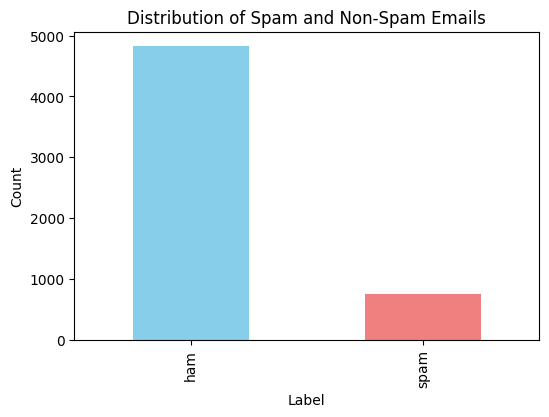

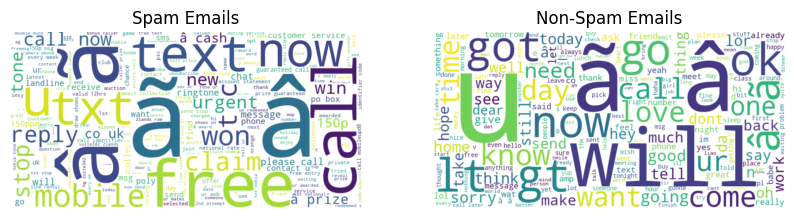

Model Accuracy: 98.03%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



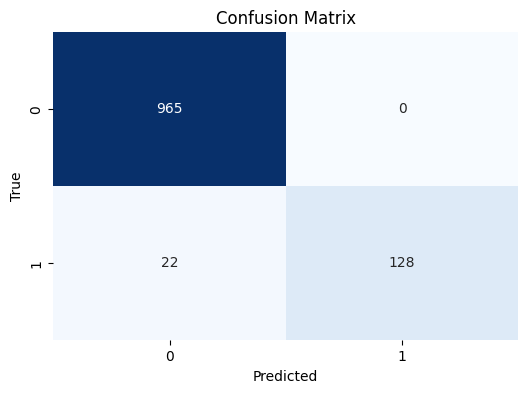

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load the dataset from 'spam.csv' with 'latin-1' encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display information about the DataFrame
df.info()

# Check for missing values
df.isna().any()

# Display the first few rows of the DataFrame
df.head()

# Visualize the distribution of spam and non-spam emails
plt.figure(figsize=(6, 4))
df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Text Preprocessing
# Apply text preprocessing techniques
df['EmailText'] = df['EmailText'].str.lower()
df['EmailText'] = df['EmailText'].str.replace('[^\w\s]', '')

# Split the data into features (X) and target (y)
X = df['EmailText']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Visualize the most frequent words in spam and non-spam emails
spam_words = " ".join(df[df['Label'] == 'spam']['EmailText'])
non_spam_words = " ".join(df[df['Label'] == 'ham']['EmailText'])

wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(non_spam_words)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Emails')
plt.axis('off')
plt.subplot(122)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Non-Spam Emails')
plt.axis('off')
plt.show()

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=12)
rf_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_vec)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


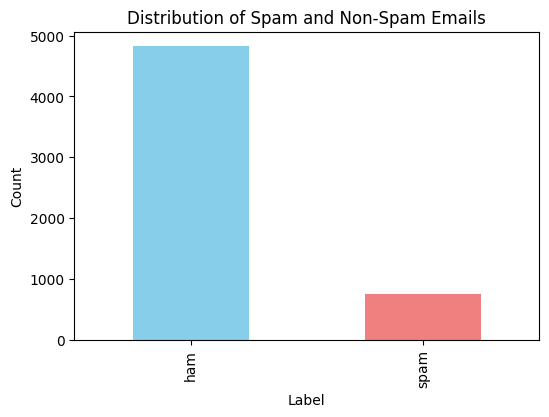

Model Accuracy: 98.03%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



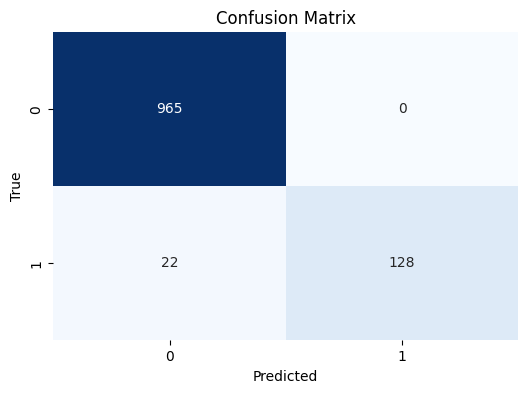

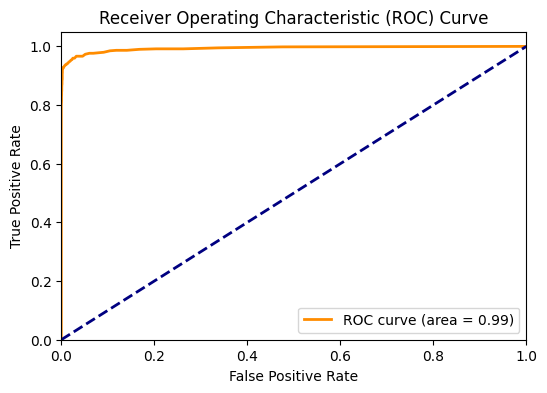

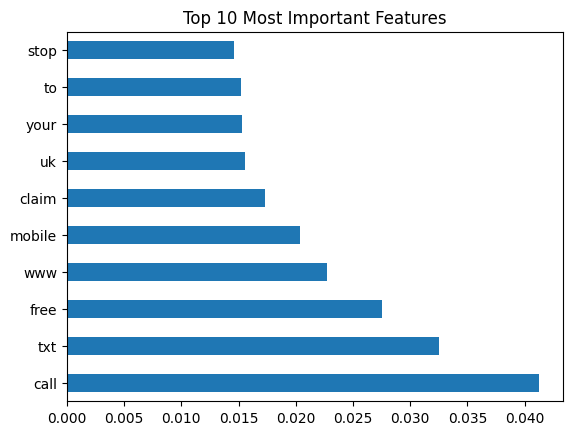

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

# Load the dataset from 'spam.csv' with 'latin-1' encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display information about the DataFrame
df.info()

# Check for missing values
df.isna().any()

# Display the first few rows of the DataFrame
df.head()

# Visualize the distribution of spam and non-spam emails
plt.figure(figsize=(6, 4))
df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Text Preprocessing
# Apply text preprocessing techniques
df['EmailText'] = df['EmailText'].str.lower()
df['EmailText'] = df['EmailText'].str.replace('[^\w\s]', '')

# Convert labels to binary (0: ham, 1: spam)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and target (y)
X = df['EmailText']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=12)
rf_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_vec)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Perform cross-validation and visualize ROC curve
y_scores = cross_val_predict(rf_classifier, X_train_vec, y_train, cv=5, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=vectorizer.get_feature_names_out())
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()
